<a href="https://colab.research.google.com/github/FGalvao77/Introducao-as-Redes-Neurais-Artificiais/blob/main/Atividade_pr%C3%A1tica_M%C3%B3dulo_2_Introdu%C3%A7%C3%A3o_%C3%A0s_redes_neurais_(parte_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade prática: Módulo 2 - Introdução às redes neurais (parte 1)**

---



Segue alguns pontos da atividade prática:
- alterei um pouco a dispersão dos dados;
- iniciei uma rede simples, somente com uma camada e;
- partir de disto, fui instanciando outras camadas e alterando a quantidade de neurônios por camadas e,
- por fim, utilizei algumas funções de ativação.

__Obs__: utilizei como consulta a própria documentação do `TensorFlow` para os métodos do argumentos de ativação. Segue o link:
- https://www.tensorflow.org/api_docs/python/tf/keras/activations

In [ ]:
# biblioteca para ignorar mensagens de alertas
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split

import keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential
# from keras.layers.normalization import BatchNormalization
from keras import metrics
from keras.callbacks import History 

import tensorflow as tf

In [ ]:
# X = np.random.uniform(low = -5, high = 10, size = 1_000)
# eps = np.random.normal(loc = 3, scale = 15, size = 1_000)

# y = (-15 * X + 5 + eps) ** 1.5

# plt.figure(figsize=(8,5))
# plt.scatter(X, y, alpha = 0.25);

In [ ]:
# X = np.random.uniform(low = -10, high = 10, size = 1_000)
# eps = np.random.normal(loc = 0, scale = 5, size = 1_000)

# y = (-5 * X + 10 + eps) ** 2

# plt.figure(figsize=(8,5))
# plt.scatter(X, y, alpha = 0.25);

In [ ]:
# X = np.random.uniform(low = -10, high = 5, size = 500)
# eps = np.random.normal(loc = 0, scale = 55, size = 500)

# y = 5 // X - 5 + eps

# plt.figure(figsize=(8,5))
# plt.scatter(X, y, alpha = 0.25);

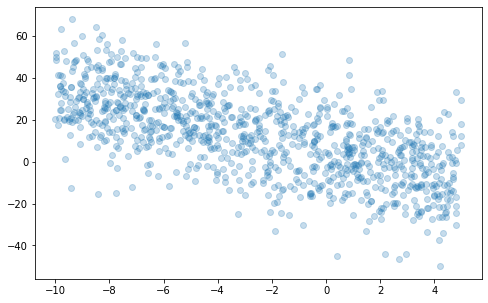

In [ ]:
X = np.random.uniform(low = -10, high = 5, size = 1_000)
eps = np.random.normal(loc = 0, scale = 15, size = 1_000)

y = -3 * X + 5 + eps 

plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha = 0.25);

In [ ]:
# particionando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import datetime
!rm -rf ./logs/
log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S') 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# rede neural simples
simple_model = keras.models.Sequential()
simple_model.add(keras.layers.Dense(1, input_shape=(1, )))

# salvando os pesos
simple_model.save_weights('pesos_iniciais')

# carregando os pesos - ideal se quero testar vários treinamentos independentes
simple_model.load_weights('pesos_iniciais')

simple_model.compile(loss='mse', 
                     optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), 
                     metrics=['mae', 'accuracy'])

simple_model.fit(x=X_train, y=y_train, epochs=500, batch_size=50, 
                 validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/500
14/14 [==============================] - 1s 17ms/step - loss: 482.0688 - mae: 17.9264 - accuracy: 0.0000e+00 - val_loss: 356.7392 - val_mae: 15.3099 - val_accuracy: 0.0000e+00
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 293.4402 - mae: 13.7772 - accuracy: 0.0000e+00 - val_loss: 275.0590 - val_mae: 13.2528 - val_accuracy: 0.0000e+00
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 250.0661 - mae: 12.6464 - accuracy: 0.0000e+00 - val_loss: 255.8016 - val_mae: 12.6379 - val_accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 240.2145 - mae: 12.4202 - accuracy: 0.0000e+00 - val_loss: 251.3222 - val_mae: 12.4569 - val_accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 237.6472 - mae: 12.3698 - accuracy: 0.0000e+00 - val_loss: 249.7891 - val_mae: 12.3954 - val_accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 4ms/step

In [ ]:
simple_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


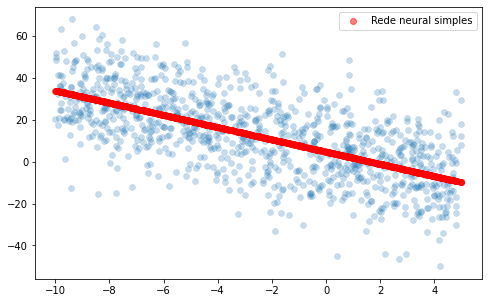

In [ ]:
ypred = simple_model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha = 0.25, linewidths= 0.5)
plt.scatter(X, ypred, alpha = 0.5, color = 'red', label = 'Rede neural simples')
plt.legend();

In [ ]:
import datetime
!rm -rf ./logs/
log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S') 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# rede neural simples
less_simple_model = keras.models.Sequential()
less_simple_model.add(keras.layers.Dense(1, input_shape=(1, )))
less_simple_model.add(tf.keras.layers.Dense(1, activation='relu'))

# salvando os pesos
less_simple_model.save_weights('pesos_iniciais')

# carregando os pesos - ideal se quero testar vários treinamentos independentes
less_simple_model.load_weights('pesos_iniciais')

less_simple_model.compile(loss='mse', 
                          optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), 
                          metrics=['mae', 'accuracy'])

less_simple_model.fit(x=X_train, y=y_train, epochs=500, batch_size=50, 
                 validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/500
14/14 [==============================] - 1s 15ms/step - loss: 539.7652 - mae: 19.0922 - accuracy: 0.0000e+00 - val_loss: 564.5395 - val_mae: 19.4011 - val_accuracy: 0.0000e+00
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 539.7010 - mae: 19.0907 - accuracy: 0.0000e+00 - val_loss: 564.5329 - val_mae: 19.4009 - val_accuracy: 0.0000e+00
Epoch 3/500
14/14 [==============================] - 0s 4ms/step - loss: 539.6999 - mae: 19.0907 - accuracy: 0.0000e+00 - val_loss: 564.5329 - val_mae: 19.4009 - val_accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 539.6999 - mae: 19.0907 - accuracy: 0.0000e+00 - val_loss: 564.5329 - val_mae: 19.4009 - val_accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 539.6999 - mae: 19.0907 - accuracy: 0.0000e+00 - val_loss: 564.5329 - val_mae: 19.4009 - val_accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 4ms/step

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
None


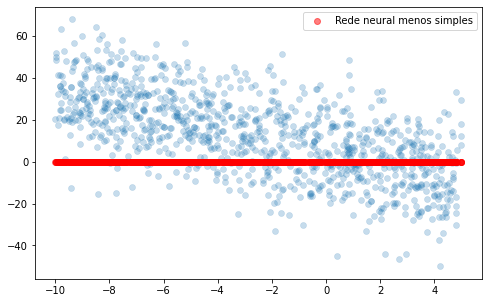

In [ ]:
print(less_simple_model.summary())

ypred = less_simple_model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha = 0.25, linewidths= 0.5)
plt.scatter(X, ypred, alpha = 0.5, color = 'red', label = 'Rede neural menos simples')
plt.legend();

In [ ]:
import datetime
!rm -rf ./logs/
log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S') 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# rede neural simples
less_simple_model = keras.models.Sequential()
less_simple_model.add(keras.layers.Dense(1, input_shape=(1, )))
less_simple_model.add(tf.keras.layers.Dense(1, activation='tanh'))

# salvando os pesos
less_simple_model.save_weights('pesos_iniciais')

# carregando os pesos - ideal se quero testar vários treinamentos independentes
less_simple_model.load_weights('pesos_iniciais')

less_simple_model.compile(loss='mse', 
                          optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), 
                          metrics=['mae', 'accuracy'])

less_simple_model.fit(x=X_train, y=y_train, epochs=500, batch_size=50, 
                 validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/500
14/14 [==============================] - 1s 15ms/step - loss: 528.3555 - mae: 18.8951 - accuracy: 0.0000e+00 - val_loss: 538.8726 - val_mae: 18.9316 - val_accuracy: 0.0000e+00
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 514.2123 - mae: 18.6160 - accuracy: 0.0000e+00 - val_loss: 538.0460 - val_mae: 18.9159 - val_accuracy: 0.0000e+00
Epoch 3/500
14/14 [==============================] - 0s 4ms/step - loss: 513.6933 - mae: 18.6054 - accuracy: 0.0000e+00 - val_loss: 537.7606 - val_mae: 18.9103 - val_accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 513.4636 - mae: 18.6004 - accuracy: 0.0000e+00 - val_loss: 537.6021 - val_mae: 18.9070 - val_accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 513.3229 - mae: 18.5975 - accuracy: 0.0000e+00 - val_loss: 537.4944 - val_mae: 18.9047 - val_accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 4ms/step

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
None


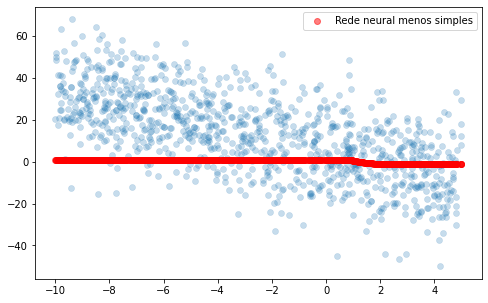

In [ ]:
print(less_simple_model.summary())

ypred = less_simple_model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha = 0.25, linewidths= 0.5)
plt.scatter(X, ypred, alpha = 0.5, color = 'red', label = 'Rede neural menos simples')
plt.legend();

In [ ]:
import datetime
!rm -rf ./logs/
log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S') 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# rede neural simples
less_simple_model = keras.models.Sequential()
less_simple_model.add(keras.layers.Dense(1, input_shape=(1, )))
less_simple_model.add(tf.keras.layers.Dense(5, activation='tanh'))
less_simple_model.add(tf.keras.layers.Dense(1, activation='relu'))

# salvando os pesos
less_simple_model.save_weights('pesos_iniciais')

# carregando os pesos - ideal se quero testar vários treinamentos independentes
less_simple_model.load_weights('pesos_iniciais')

less_simple_model.compile(loss='mse', 
                          optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), 
                          metrics=['mae', 'accuracy'])

less_simple_model.fit(x=X_train, y=y_train, epochs=500, batch_size=50, 
                 validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/500
14/14 [==============================] - 1s 16ms/step - loss: 505.9070 - mae: 18.4635 - accuracy: 0.0000e+00 - val_loss: 504.4422 - val_mae: 18.3092 - val_accuracy: 0.0000e+00
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 463.3885 - mae: 17.6132 - accuracy: 0.0000e+00 - val_loss: 463.4199 - val_mae: 17.5060 - val_accuracy: 0.0000e+00
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 427.3516 - mae: 16.8528 - accuracy: 0.0000e+00 - val_loss: 429.2749 - val_mae: 16.8023 - val_accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 397.7076 - mae: 16.2252 - accuracy: 0.0000e+00 - val_loss: 401.1537 - val_mae: 16.2111 - val_accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 373.4659 - mae: 15.6635 - accuracy: 0.0000e+00 - val_loss: 378.0739 - val_mae: 15.7131 - val_accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 4ms/step

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 5)                 10        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________
None


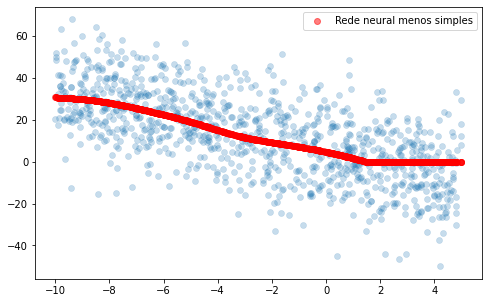

In [ ]:
print(less_simple_model.summary())

ypred = less_simple_model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha = 0.25, linewidths= 0.5)
plt.scatter(X, ypred, alpha = 0.5, color = 'red', label = 'Rede neural menos simples')
plt.legend();

In [ ]:
import datetime
!rm -rf ./logs/
log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S') 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# rede neural simples
less_simple_model = keras.models.Sequential()
less_simple_model.add(keras.layers.Dense(3, input_shape=(1, )))
less_simple_model.add(tf.keras.layers.Dense(5, activation='tanh'))
less_simple_model.add(tf.keras.layers.Dense(1, activation='relu'))

# salvando os pesos
less_simple_model.save_weights('pesos_iniciais')

# carregando os pesos - ideal se quero testar vários treinamentos independentes
less_simple_model.load_weights('pesos_iniciais')

less_simple_model.compile(loss='mse', 
                          optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), 
                          metrics=['mae', 'accuracy'])

less_simple_model.fit(x=X_train, y=y_train, epochs=500, batch_size=50, 
                 validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/500
14/14 [==============================] - 1s 16ms/step - loss: 512.3345 - mae: 18.5870 - accuracy: 0.0000e+00 - val_loss: 507.1277 - val_mae: 18.3591 - val_accuracy: 0.0000e+00
Epoch 2/500
14/14 [==============================] - 0s 6ms/step - loss: 465.7547 - mae: 17.6657 - accuracy: 0.0000e+00 - val_loss: 465.8251 - val_mae: 17.5566 - val_accuracy: 0.0000e+00
Epoch 3/500
14/14 [==============================] - 0s 4ms/step - loss: 429.5241 - mae: 16.9083 - accuracy: 0.0000e+00 - val_loss: 431.3678 - val_mae: 16.8509 - val_accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 6ms/step - loss: 399.6179 - mae: 16.2407 - accuracy: 0.0000e+00 - val_loss: 402.9975 - val_mae: 16.2570 - val_accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 375.0929 - mae: 15.6931 - accuracy: 0.0000e+00 - val_loss: 379.6506 - val_mae: 15.7609 - val_accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 5ms/step

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 6         
                                                                 
 dense_9 (Dense)             (None, 5)                 20        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________
None


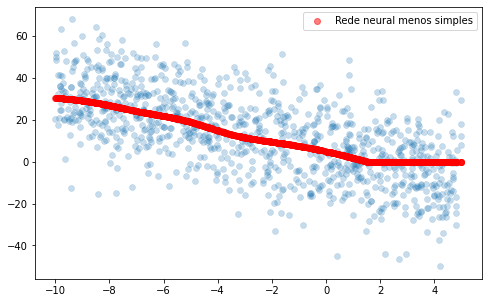

In [ ]:
print(less_simple_model.summary())

ypred = less_simple_model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha = 0.25, linewidths= 0.5)
plt.scatter(X, ypred, alpha = 0.5, color = 'red', label = 'Rede neural menos simples')
plt.legend();

In [ ]:
import datetime
!rm -rf ./logs/
log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S') 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# rede neural simples
less_simple_model = keras.models.Sequential()
less_simple_model.add(keras.layers.Dense(8, input_shape=(1, )))
less_simple_model.add(tf.keras.layers.Dense(3, activation='tanh'))
less_simple_model.add(tf.keras.layers.Dense(15, activation='tanh'))
less_simple_model.add(tf.keras.layers.Dense(1, activation='relu'))

# salvando os pesos
less_simple_model.save_weights('pesos_iniciais')

# carregando os pesos - ideal se quero testar vários treinamentos independentes
less_simple_model.load_weights('pesos_iniciais')

less_simple_model.compile(loss='mse', 
                          optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), 
                          metrics=['mae', 'accuracy'])

less_simple_model.fit(x=X_train, y=y_train, epochs=500, batch_size=50, 
                 validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/500
14/14 [==============================] - 1s 18ms/step - loss: 540.9866 - mae: 19.1216 - accuracy: 0.0000e+00 - val_loss: 565.0510 - val_mae: 19.4172 - val_accuracy: 0.0000e+00
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 540.5292 - mae: 19.1106 - accuracy: 0.0000e+00 - val_loss: 564.7481 - val_mae: 19.4095 - val_accuracy: 0.0000e+00
Epoch 3/500
14/14 [==============================] - 0s 4ms/step - loss: 540.0842 - mae: 19.1006 - accuracy: 0.0000e+00 - val_loss: 564.4952 - val_mae: 19.4022 - val_accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 539.7426 - mae: 19.0937 - accuracy: 0.0000e+00 - val_loss: 564.3600 - val_mae: 19.3980 - val_accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 539.6452 - mae: 19.0909 - accuracy: 0.0000e+00 - val_loss: 564.3646 - val_mae: 19.3980 - val_accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 4ms/step

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 8)                 16        
                                                                 
 dense_12 (Dense)            (None, 3)                 27        
                                                                 
 dense_13 (Dense)            (None, 15)                60        
                                                                 
 dense_14 (Dense)            (None, 1)                 16        
                                                                 
Total params: 119
Trainable params: 119
Non-trainable params: 0
_________________________________________________________________
None


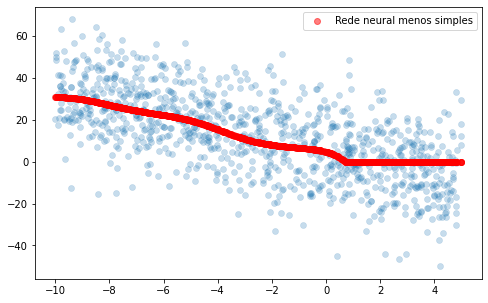

In [ ]:
print(less_simple_model.summary())

ypred = less_simple_model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha = 0.25, linewidths= 0.5)
plt.scatter(X, ypred, alpha = 0.5, color = 'red', label = 'Rede neural menos simples')
plt.legend();

In [ ]:
import datetime
!rm -rf ./logs/
log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S') 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# rede neural simples
less_simple_model = keras.models.Sequential()
less_simple_model.add(keras.layers.Dense(5, input_shape=(1, ), activation='LeakyReLU'))
less_simple_model.add(tf.keras.layers.Dense(8, activation='tanh'))
less_simple_model.add(tf.keras.layers.Dense(15, activation='tanh'))
less_simple_model.add(tf.keras.layers.Dense(15, activation='relu'))
less_simple_model.add(tf.keras.layers.Dense(15, activation='tanh'))
less_simple_model.add(tf.keras.layers.Dense(3, activation='tanh'))
less_simple_model.add(tf.keras.layers.Dense(1, activation='relu'))

# salvando os pesos
less_simple_model.save_weights('pesos_iniciais')

# carregando os pesos - ideal se quero testar vários treinamentos independentes
less_simple_model.load_weights('pesos_iniciais')

less_simple_model.compile(loss='mse', 
                          optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), 
                          metrics=['mae', 'accuracy'])

less_simple_model.fit(x=X_train, y=y_train, epochs=500, batch_size=50, 
                 validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/500
14/14 [==============================] - 1s 18ms/step - loss: 516.7131 - mae: 18.6676 - accuracy: 0.0000e+00 - val_loss: 524.7069 - val_mae: 18.6848 - val_accuracy: 0.0000e+00
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 491.8405 - mae: 18.1949 - accuracy: 0.0000e+00 - val_loss: 501.1948 - val_mae: 18.2379 - val_accuracy: 0.0000e+00
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 468.8207 - mae: 17.7335 - accuracy: 0.0000e+00 - val_loss: 475.9648 - val_mae: 17.7281 - val_accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 444.1019 - mae: 17.2325 - accuracy: 0.0000e+00 - val_loss: 451.2747 - val_mae: 17.2062 - val_accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 421.8196 - mae: 16.7667 - accuracy: 0.0000e+00 - val_loss: 429.4172 - val_mae: 16.7482 - val_accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 5ms/step

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 10        
                                                                 
 dense_16 (Dense)            (None, 8)                 48        
                                                                 
 dense_17 (Dense)            (None, 15)                135       
                                                                 
 dense_18 (Dense)            (None, 15)                240       
                                                                 
 dense_19 (Dense)            (None, 15)                240       
                                                                 
 dense_20 (Dense)            (None, 3)                 48        
                                                                 
 dense_21 (Dense)            (None, 1)                

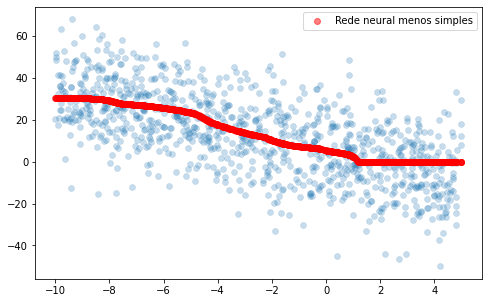

In [ ]:
print(less_simple_model.summary())

ypred = less_simple_model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha = 0.25, linewidths= 0.5)
plt.scatter(X, ypred, alpha = 0.5, color = 'red', label = 'Rede neural menos simples')
plt.legend();